In [1]:
#impoting libraries
import pandas as pd
import matplotlib.pyplot as plt
import random 
import missingno as msno
import numpy as np

In [2]:
# Imorting data and dividing two diffrent data
df = pd.read_csv("BitcoinHeistData.csv")

whole_white_data = df[df['label']=='white']

black_data = df[df['label']!='white']

In [3]:
# Random selection and down sampling of the white data
whole_white_data.count()
white_data = []
white_data = whole_white_data.iloc[random.sample(range(len(whole_white_data)), 1000000)]



In [4]:
#Previwing both data
print(white_data.head())

print(black_data.head())

                                    address  year  day  length        weight  \
1571972  12fiTu9H5XjLzywRSKN6rQ7MNVNUnSP2vZ  2015   81     144  1.053584e+00   
630021   16M5i7Dg7VWxHXFveFa9FF4dnV83p4eHJE  2012  234       2  1.440972e-02   
2656569  35vD58TuwhKRATkmG6peGBtj4KLCBuF59f  2018   70       6  1.041667e-01   
929328   1KrcEoLAAm7iPhukMSQ4PQhQA233GodkKD  2013  168      44  3.576279e-07   
1551297  13B196emC5eoW2v1thngAMH1UeuBZHvTf2  2015   60       4  2.500000e-01   

         count  looped  neighbors        income  label  
1571972   1567       0          1  5.206800e+08  white  
630021      45       0          1  1.020000e+08  white  
2656569      2       0          1  3.958544e+07  white  
929328       3       0          2  5.462843e+09  white  
1551297      2       0          2  4.300000e+07  white  
                              address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w64

In [5]:
#Seprating black labels
black_data['label']= 'black'

#print(df1.label.unique())

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
#Appending black data to white data
df1 = black_data.append(white_data)

df1.describe()

,year,day,length,weight,count,looped,neighbors,income
count,1.041413e+06,1.041413e+06,1.041413e+06,1.041413e+06,1.041413e+06,1.041413e+06,1.041413e+06,1.041413e+06
mean,2.014484e+03,1.813049e+02,4.486268e+01,5.450392e-01,7.171054e+02,2.328326e+02,2.189469e+00,4.465411e+09
std,2.239719e+00,1.037335e+02,5.893724e+01,3.428142e+00,1.682191e+03,9.533303e+02,1.799478e+01,1.708115e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,8.973914e-88,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.255795e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.471161e+07
50%,2.014000e+03,1.800000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.996315e+08
75%,2.016000e+03,2.710000e+02,1.060000e+02,8.952908e-01,5.500000e+01,0.000000e+00,2.000000e+00,9.656168e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.866717e+03,1.449700e+04,1.449600e+04,1.174600e+04,4.978520e+13


In [7]:
#viwing data type of columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041413 entries, 0 to 1686802
Data columns (total 10 columns):
address      1041413 non-null object
year         1041413 non-null int64
day          1041413 non-null int64
length       1041413 non-null int64
weight       1041413 non-null float64
count        1041413 non-null int64
looped       1041413 non-null int64
neighbors    1041413 non-null int64
income       1041413 non-null float64
label        1041413 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 87.4+ MB


In [8]:
#Changinging data type 'year','day'and 'label' to category
df1['year'] = df1['year'].astype('category')
df1['day'] = df1['day'].astype('category')
df1['label'] = df1['label'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041413 entries, 0 to 1686802
Data columns (total 10 columns):
address      1041413 non-null object
year         1041413 non-null category
day          1041413 non-null category
length       1041413 non-null int64
weight       1041413 non-null float64
count        1041413 non-null int64
looped       1041413 non-null int64
neighbors    1041413 non-null int64
income       1041413 non-null float64
label        1041413 non-null category
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 67.5+ MB


In [9]:
#verifing unique years
df1['year'].unique()

[2017, 2016, 2013, 2014, 2015, 2012, 2011, 2018]
Categories (8, int64): [2017, 2016, 2013, 2014, 2015, 2012, 2011, 2018]

In [10]:
#verifing uniqe days
df1['day'].unique()

[11, 132, 246, 322, 238, ..., 129, 42, 15, 16, 365]
Length: 365
Categories (365, int64): [11, 132, 246, 322, ..., 42, 15, 16, 365]

In [11]:
#Checking for duplicates
duplicates = df1.duplicated()

df1[duplicates]


,address,year,day,length,weight,count,looped,neighbors,income,label


In [12]:
#Checking yearly distribution of the data 
df1.groupby('year').count()

,address,day,length,weight,count,looped,neighbors,income,label
year,,,,,,,,,
2011,123739,123739,123739,123739,123739,123739,123739,123739,123739
2012,127492,127492,127492,127492,127492,127492,127492,127492,127492
2013,135047,135047,135047,135047,135047,135047,135047,135047,135047
2014,137251,137251,137251,137251,137251,137251,137251,137251,137251
2015,130690,130690,130690,130690,130690,130690,130690,130690,130690
2016,142183,142183,142183,142183,142183,142183,142183,142183,142183
2017,130069,130069,130069,130069,130069,130069,130069,130069,130069
2018,114942,114942,114942,114942,114942,114942,114942,114942,114942


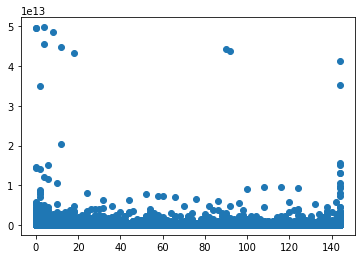

In [13]:
#Visulaising length vs income of data

plt.scatter(x='length' , y = 'income' , data = df1)
plt.show()

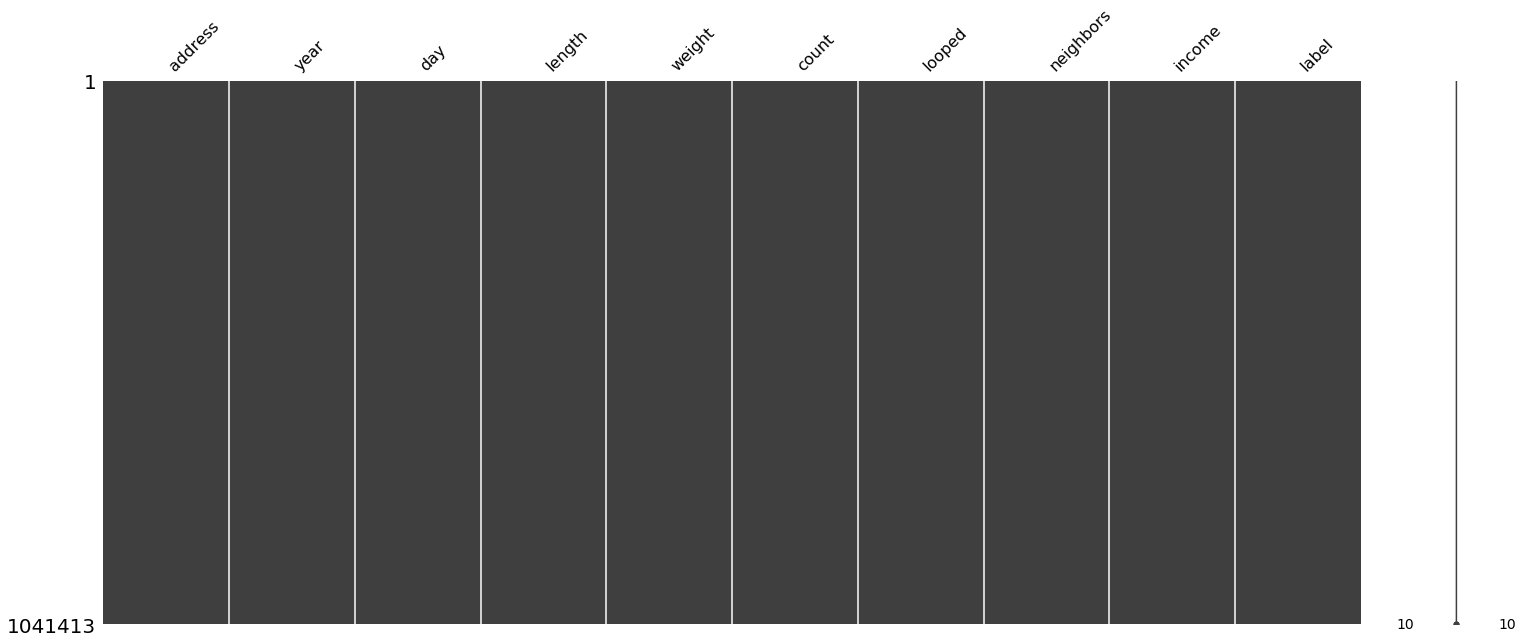

In [14]:
#verifing missing number
msno.matrix(df1)
plt.show()

In [15]:
#duplicate address checking (transactaion from same address)
duplicates1 = df1.duplicated(subset=['address'],keep=False)

df1[duplicates1].groupby('address').count()


,year,day,length,weight,count,looped,neighbors,income,label
address,,,,,,,,,
111213xkVmeHT1v7N7Ff43XmVfLAUq7WEZ,2,2,2,2,2,2,2,2,2
111khWGs3Mj7UgKT7aS6hLsYK11ii4Gmw,2,2,2,2,2,2,2,2,2
1121A3vrYYduVPMnfS87ieHFP2bwy6xriv,3,3,3,3,3,3,3,3,3
1121Sj9pNXPy4qKpRGYvRJKK7d7sCFVPHc,2,2,2,2,2,2,2,2,2
112345FMq98vjXZTbet2nYHtvqX8p9qQKt,3,3,3,3,3,3,3,3,3
1123vJ5FJyKyxA92qNxwzTY73Bweu5c7nu,2,2,2,2,2,2,2,2,2
1127EVekJYumhffn6cG98GNaySwmxPEPqb,2,2,2,2,2,2,2,2,2
11294hG2EkWs22Lsza2yZmsRpnySshw5me,2,2,2,2,2,2,2,2,2
112Go7VKdHhe6D9pR9Wdj41g21hgJRhrpn,3,3,3,3,3,3,3,3,3


In [16]:
#duplicate address (transaction on same year)

duplicates2 = df1.duplicated(subset=['address','year'],keep=False)

dup_df1 = df1[duplicates2].groupby(['address','year']).count()

dup_df1

day  length  weight  count  looped  \
address                            year                                       
111213xkVmeHT1v7N7Ff43XmVfLAUq7WEZ 2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  2.0     2.0     2.0    2.0     2.0   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  NaN     NaN     NaN    NaN     NaN   
                                   2016  NaN     NaN     NaN    NaN     NaN   
                                   2017  NaN     NaN     NaN    NaN     NaN   
                                   2018  NaN     NaN     NaN    NaN     NaN   
111khWGs3Mj7UgKT7aS6hLsYK11ii4Gmw  2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  NaN     NaN     NaN    NaN     NaN   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  2.0     2.0     2.0    2.0     2.0   
                                   2016  NaN     NaN     NaN    NaN     NaN   
                                   2017  NaN     NaN     NaN    NaN     NaN   
                                   2018  NaN     NaN     NaN    NaN     NaN   
1121A3vrYYduVPMnfS87ieHFP2bwy6xriv 2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  NaN     NaN     NaN    NaN     NaN   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  NaN     NaN     NaN    NaN     NaN   
                                   2016  NaN     NaN     NaN    NaN     NaN   
                                   2017  2.0     2.0     2.0    2.0     2.0   
                                   2018  NaN     NaN     NaN    NaN     NaN   
1121Sj9pNXPy4qKpRGYvRJKK7d7sCFVPHc 2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  NaN     NaN     NaN    NaN     NaN   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  2.0     2.0     2.0    2.0     2.0   
                                   2015  NaN     NaN     NaN    NaN     NaN   
                                   2016  NaN     NaN     NaN    NaN     NaN   
...                                      ...     ...     ...    ...     ...   
3QtgxLxy1hE8oaMhsDQWwYLtf21mwmJVRp 2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  NaN     NaN     NaN    NaN     NaN   
                                   2016  NaN     NaN     NaN    NaN     NaN   
                                   2017  NaN     NaN     NaN    NaN     NaN   
                                   2018  4.0     4.0     4.0    4.0     4.0   
3Qy5mTpumWh24f5UdwGPJEhStoD3A25fK9 2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  NaN     NaN     NaN    NaN     NaN   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  NaN     NaN     NaN    NaN     NaN   
                                   2016  2.0     2.0     2.0    2.0     2.0   
                                   2017  4.0     4.0     4.0    4.0     4.0   
                                   2018  4.0     4.0     4.0    4.0     4.0   
3QyGuJPmuA2HDxxVihQG2LLPgj2taLnJ8K 2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  NaN     NaN     NaN    NaN     NaN   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
            

In [17]:
#removing NAN value
#dup_df1.agg(lambda x: np.nan if x.isnull().all() else x.dropna())
dup_df1.dropna()

,,day,length,weight,count,looped,neighbors,income,label
address,year,,,,,,,,
111213xkVmeHT1v7N7Ff43XmVfLAUq7WEZ,2012,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
111khWGs3Mj7UgKT7aS6hLsYK11ii4Gmw,2015,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1121A3vrYYduVPMnfS87ieHFP2bwy6xriv,2017,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1121Sj9pNXPy4qKpRGYvRJKK7d7sCFVPHc,2014,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
112345FMq98vjXZTbet2nYHtvqX8p9qQKt,2012,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1127EVekJYumhffn6cG98GNaySwmxPEPqb,2014,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
11294hG2EkWs22Lsza2yZmsRpnySshw5me,2011,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
112Go7VKdHhe6D9pR9Wdj41g21hgJRhrpn,2013,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
112KFspUbaqEadpkBa6W5741xP5oFFGo16,2012,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [18]:
#duplicate address (transaction on same day)

duplicates3 = df1.duplicated(subset=['address','year','day'],keep=False)

df1[duplicates3]

,address,year,day,length,weight,count,looped,neighbors,income,label


In [20]:
#importing plotting libraries
import seaborn as sns

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041413 entries, 0 to 1686802
Data columns (total 10 columns):
address      1041413 non-null object
year         1041413 non-null category
day          1041413 non-null category
length       1041413 non-null int64
weight       1041413 non-null float64
count        1041413 non-null int64
looped       1041413 non-null int64
neighbors    1041413 non-null int64
income       1041413 non-null float64
label        1041413 non-null category
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 67.5+ MB


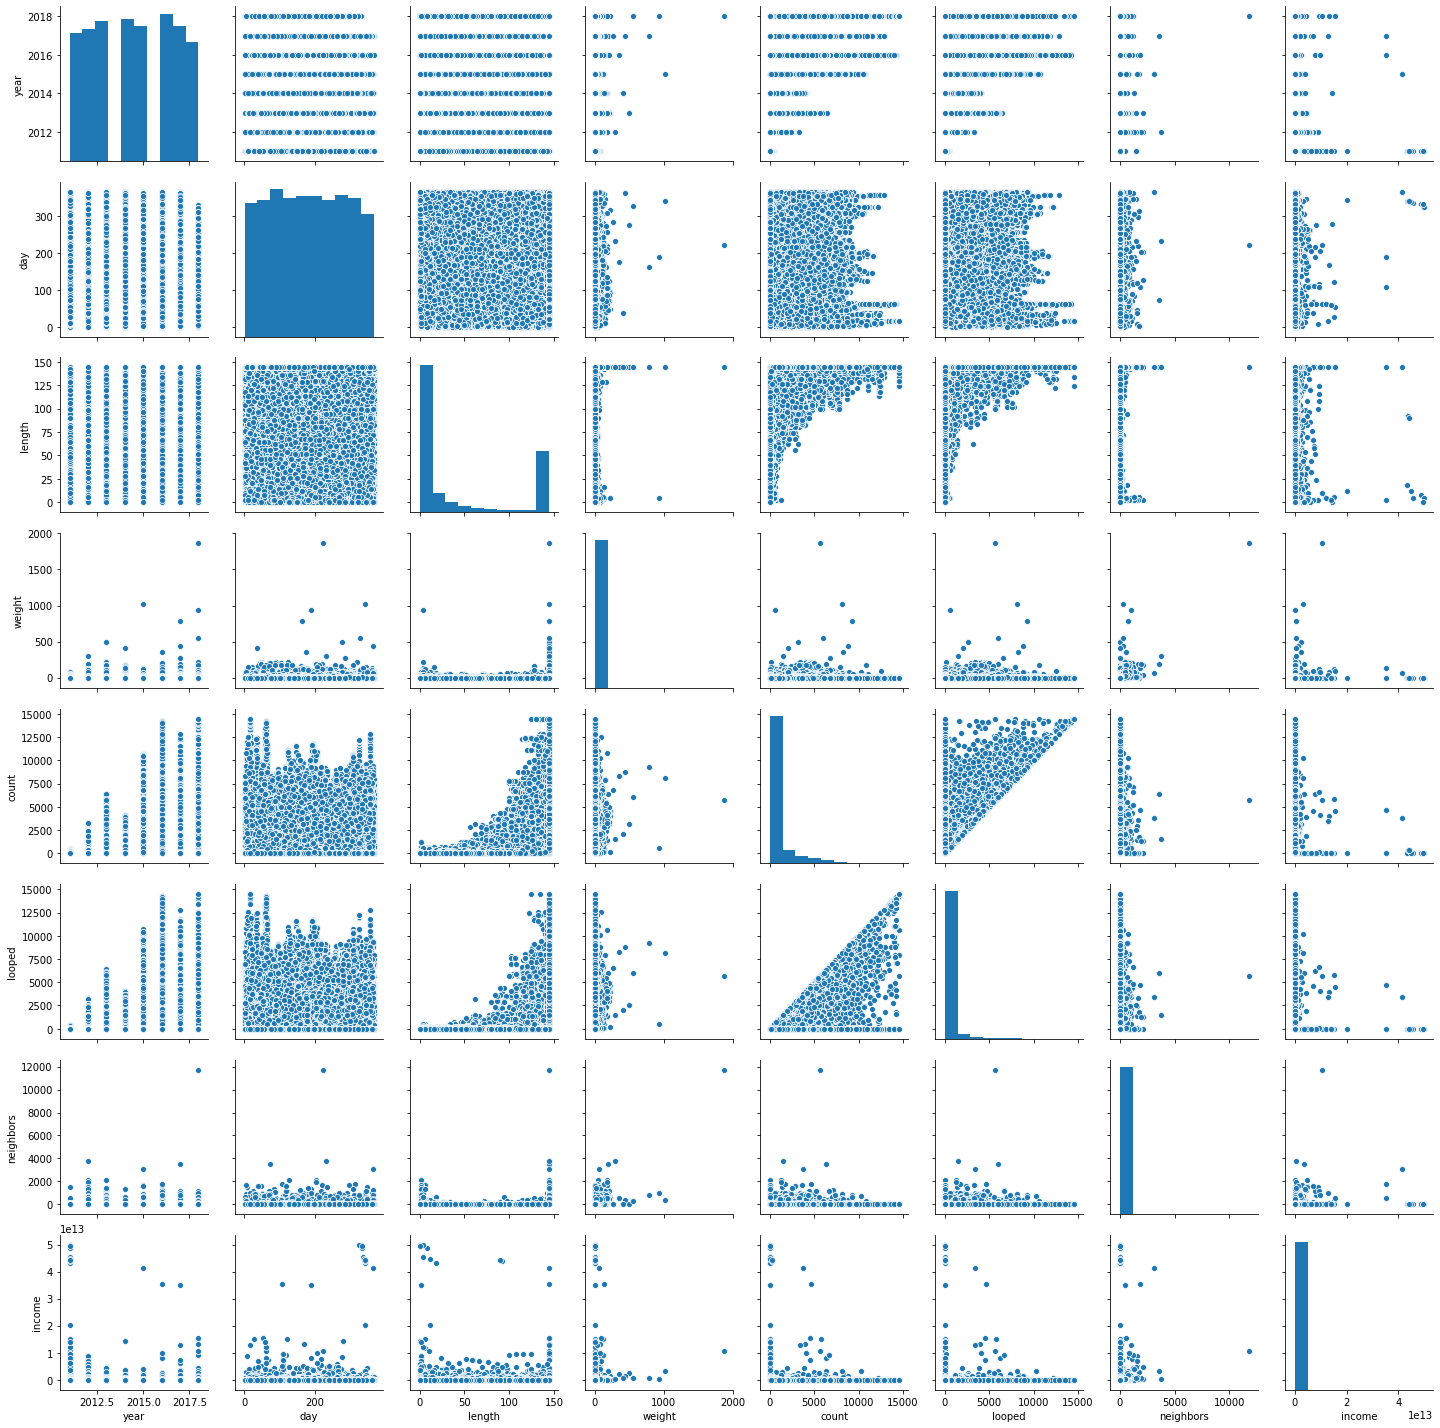

In [23]:
sns.pairplot(df1)


In [24]:
plt.show()

In [25]:
df1.corr()

,length,weight,count,looped,neighbors,income
length,1.000000,0.000235,0.703837,0.408199,0.031213,0.001046
weight,0.000235,1.000000,0.022012,0.063343,0.692815,0.088506
count,0.703837,0.022012,1.000000,0.555988,0.025491,-0.002486
looped,0.408199,0.063343,0.555988,1.000000,0.052814,0.004320
neighbors,0.031213,0.692815,0.025491,0.052814,1.000000,0.173195
income,0.001046,0.088506,-0.002486,0.004320,0.173195,1.000000


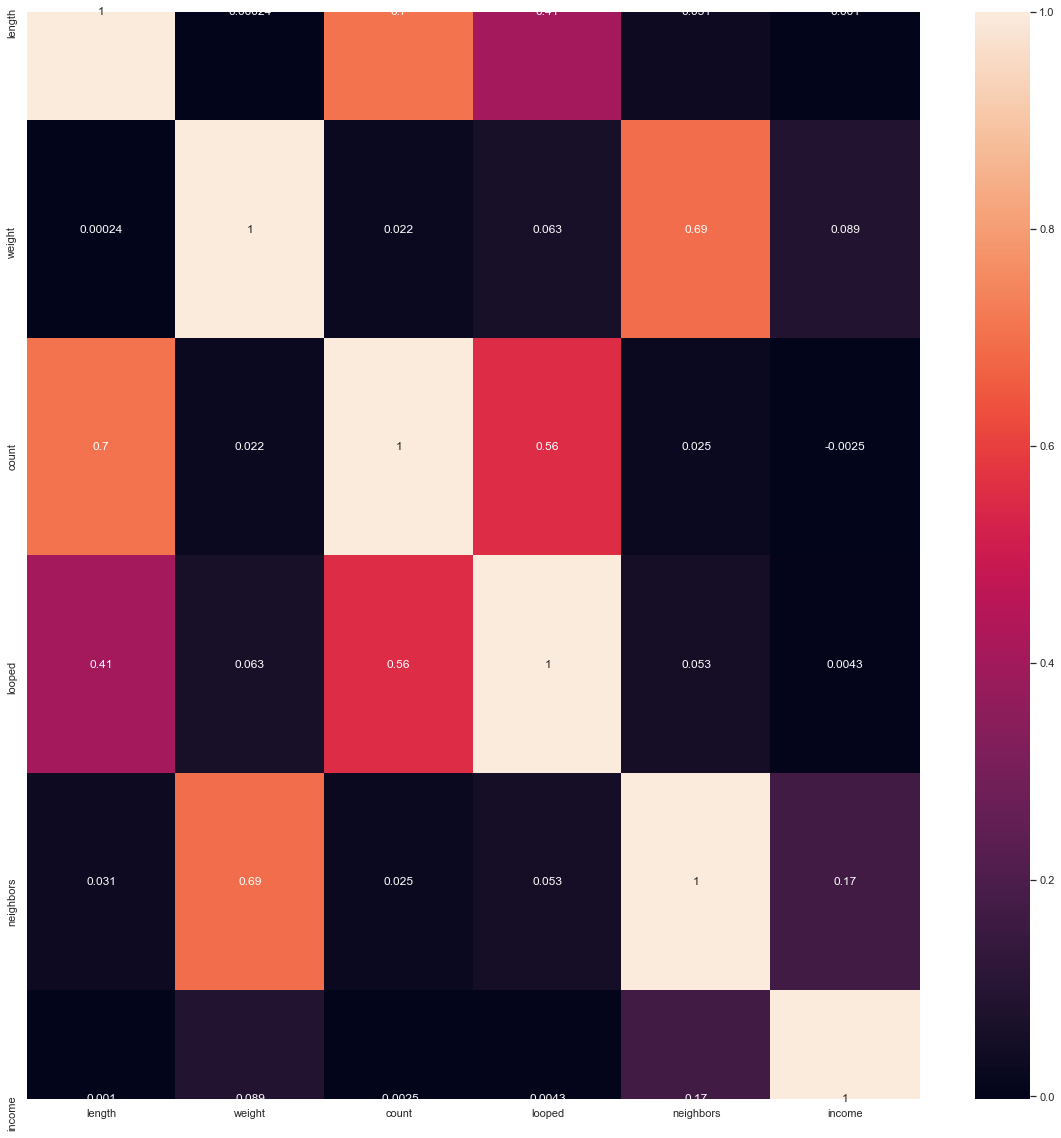

<Figure size 432x288 with 0 Axes>

In [47]:
_=plt.figure(figsize=(20,20))
_=sns.heatmap(df1.corr(),annot=True)
plt.show()
plt.savefig("ransomware_heatmap.jpg")

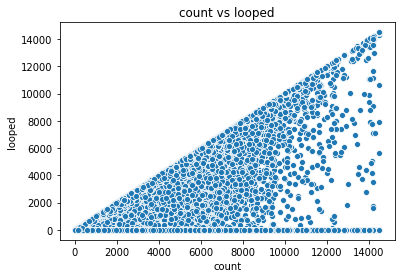

In [27]:
sns.scatterplot(x='count',y='looped',data = df1)
plt.xlabel('count')
plt.ylabel('looped')
plt.title('count vs looped')
plt.show()

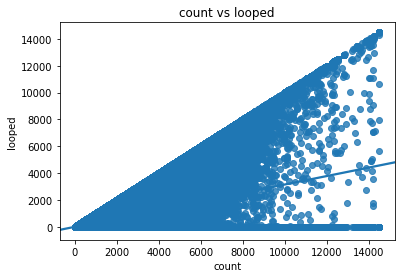

In [29]:
sns.regplot (x='count',y='looped',data = df1)
plt.xlabel('count')
plt.ylabel('looped')
plt.title('count vs looped')
plt.show()

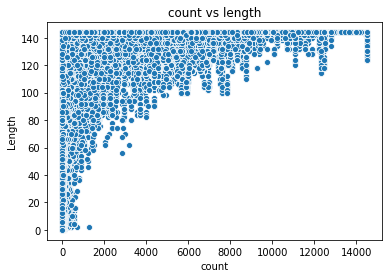

In [36]:
sns.scatterplot(x='count',y='length',data = df1)
plt.xlabel('count')
plt.ylabel('Length')
plt.title('count vs length')
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


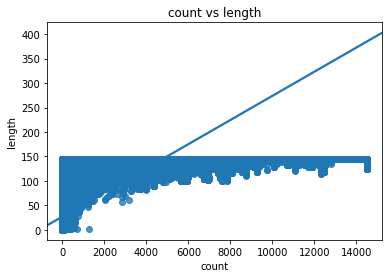

In [37]:
sns.regplot (x='count',y='length',data = df1)
plt.xlabel('count')
plt.ylabel('length')
plt.title('count vs length')
plt.show()

In [ ]:
sns.set()

_ = sns.boxplot(x = 'count',y = 'length', data = df)
plt.xlabel('count')
plt.ylabel('length')
plt.show()